In [ ]:
import pandas as pd
import numpy as np

In [ ]:
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

data = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")
df = data[0]
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [ ]:
df.shape

(28, 9)

In [ ]:
df.replace('—', np.nan, inplace=True)

In [ ]:
df.dtypes

,0
Регіон,object
1950,float64
1960,float64
1970,float64
1990,float64
2000,float64
2012,float64
2014,object
2019,object


In [ ]:
nan_columns = df.columns[df.isnull().any()].tolist()
nan_columns
df[nan_columns] = df[nan_columns].astype(float)
df.dtypes

,0
Регіон,object
1950,float64
1960,float64
1970,float64
1990,float64
2000,float64
2012,float64
2014,float64
2019,float64


In [ ]:
for col in df.columns:
  null_values_count = df[col].isnull().sum()

  if null_values_count > 0:
    print(col, ' : ', null_values_count)

1950  :  2
1960  :  1
1970  :  1
2014  :  2
2019  :  4


In [ ]:
country_index = df[df['Регіон'] == 'Україна'].index
country_index

df.drop(country_index, inplace=True)

df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [ ]:

pd.options.display.float_format = '{:.2f}'.format

for col in df.columns:
  if df[col].isnull().any():
    df[col] = df[col].fillna(df[col].mean())

df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.00,20.60,16.00,13.00,7.30,12.60,11.14,8.02
1,Вінницька,22.40,19.20,14.20,12.40,8.40,11.20,10.90,7.60
2,Волинська,24.70,25.00,17.90,15.30,11.20,14.80,14.10,10.10
3,Дніпропетровська,20.40,20.40,15.10,12.30,7.10,11.20,11.10,7.10
4,Донецька,27.10,21.40,14.00,10.90,6.10,9.80,8.20,8.02
5,Житомирська,26.10,22.30,15.90,12.90,8.90,12.20,12.00,7.90
6,Закарпатська,31.40,27.30,20.70,16.80,11.50,15.10,14.60,10.40
7,Запорізька,21.90,19.70,15.00,12.40,7.10,10.60,10.60,6.80
8,Івано-Франківська,24.30,24.80,18.20,15.50,10.30,12.40,12.20,8.80
9,Київська,20.40,18.90,15.60,12.30,7.30,12.20,12.10,8.00


In [41]:
avg_2019 = df['2019'].mean()
df[df['2019'] > avg_2019][['Регіон', '2019']]

,Регіон,2019
2,Волинська,10.10
6,Закарпатська,10.40
8,Івано-Франківська,8.80
12,Львівська,8.70
14,Одеська,8.80
16,Рівненська,10.70
20,Херсонська,8.10
23,Чернівецька,9.20
25,Київ,11.00


In [49]:
max = df['2014'].max()
df[df['2014'] == max][['Регіон']]

,Регіон
16,Рівненська


<Axes: xlabel='Регіон', ylabel='2019'>

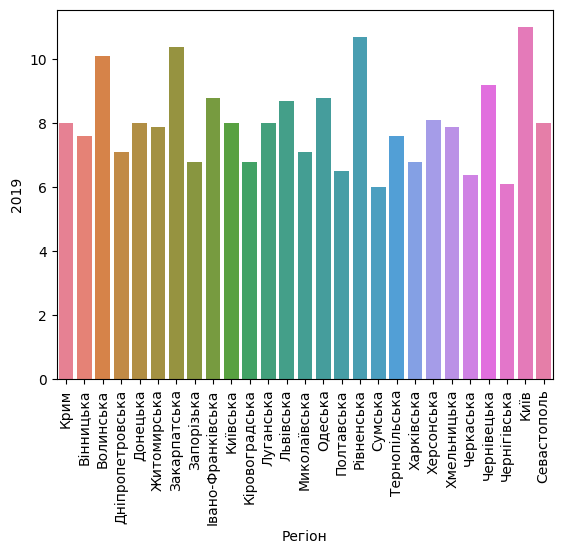

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.xticks(rotation=90)
sns.barplot(x='Регіон', y='2019', hue='Регіон', data=df)